In [49]:
# Dependencies ans Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create new empty list to hold the data
cities_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [4]:
# Performing API calls

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        cities_name_list .append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter < 50:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 2 : georgetown
City not found. Skipping...
Processing Record 0 of Set 3 : sohag
City not found. Skipping...
Processing Record 0 of Set 4 : ushuaia
Processing Record 0 of Set 5 : new norfolk
Processing Record 0 of Set 6 : great falls
Processing Record 0 of Set 7 : kawalu
Processing Record 0 of Set 8 : vaini
Processing Record 0 of Set 9 : bluff
Processing Record 0 of Set 10 : tuatapere
Processing Record 0 of Set 11 : qaanaaq
Processing Record 0 of Set 12 : busselton
Processing Record 0 of Set 13 : bhit shah
Processing Record 0 of Set 14 : broome
Processing Record 0 of Set 15 : chuy
Processing Record 0 of Set 16 : belyy yar
Processing Record 0 of Set 17 : rikitea
Processing Record 0 of Set 18 : yining
Processing Record 0 of Set 19 : mehamn
Processing Record 0 of Set 20 : coquimbo
City not found. Skipping...
Processing Record 0 of Set 21 : tasiilaq
Processing Record 0 of Set 22 : miyako
Processing Record 0 o

Processing Record 0 of Set 184 : lorengau
Processing Record 0 of Set 185 : kankon
Processing Record 0 of Set 186 : tawau
Processing Record 0 of Set 187 : boma
City not found. Skipping...
Processing Record 0 of Set 188 : puebloviejo
Processing Record 0 of Set 189 : ribeira grande
Processing Record 0 of Set 190 : katsuura
Processing Record 0 of Set 191 : nome
Processing Record 0 of Set 192 : saint-leu
Processing Record 0 of Set 193 : yumen
Processing Record 0 of Set 194 : katangli
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 0 of Set 195 : cayenne
Processing Record 0 of Set 196 : lichuan
Processing Record 0 of Set 197 : novichikha
Processing Record 0 of Set 198 : lasa
Processing Record 0 of Set 199 : gouyave
Processing Record 0 of Set 200 : ponta do sol
Processing Record 0 of Set 201 : ono
Processing Record 0 of Set 202 : rio gallegos
Processing Record 0 of Set 203 : puerto carreno
Processing Record 0 of Set 204 : pecos
Processing 

Processing Record 0 of Set 367 : sao filipe
Processing Record 0 of Set 368 : yanam
Processing Record 0 of Set 369 : corner brook
Processing Record 0 of Set 370 : herat
Processing Record 0 of Set 371 : tura
Processing Record 0 of Set 372 : qandala
Processing Record 0 of Set 373 : gornyak
Processing Record 0 of Set 374 : marienburg
Processing Record 0 of Set 375 : richards bay
Processing Record 0 of Set 376 : bogatyr
Processing Record 0 of Set 377 : altay
Processing Record 0 of Set 378 : laguna
Processing Record 0 of Set 379 : destin
Processing Record 0 of Set 380 : puro
City not found. Skipping...
Processing Record 0 of Set 381 : vila
Processing Record 0 of Set 382 : bagdarin
Processing Record 0 of Set 383 : hay river
Processing Record 0 of Set 384 : vad
Processing Record 0 of Set 385 : grand gaube
Processing Record 0 of Set 386 : morros
Processing Record 0 of Set 387 : redlands
Processing Record 0 of Set 388 : viedma
Processing Record 0 of Set 389 : tiszanana
Processing Record 0 of Set

Processing Record 0 of Set 550 : ambanja
Processing Record 0 of Set 551 : seda
Processing Record 0 of Set 552 : hirara
Processing Record 0 of Set 553 : hanzhong
Processing Record 0 of Set 554 : haimen
Processing Record 0 of Set 555 : kupang
Processing Record 0 of Set 556 : half moon bay
Processing Record 0 of Set 557 : iskateley
Processing Record 0 of Set 558 : pirayu
Processing Record 0 of Set 559 : yerbogachen
Processing Record 0 of Set 560 : kargil
City not found. Skipping...
Processing Record 0 of Set 561 : luanda
Processing Record 0 of Set 562 : ibipeba
Processing Record 0 of Set 563 : tautira
Processing Record 0 of Set 564 : aborlan
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
# Create a dictionary with the data retrieved
weather_data_dict = { 
                "City" : cities_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
}

# Convert raw data to dataFrame
weather_df = pd.DataFrame.from_dict(weather_data_dict, orient='index')

# Transpose rows and columns
weather_df = weather_df.transpose()

# Download retrieved data into a csv file named cities_output
weather_df.to_csv("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/cities_output.csv", index=False,header=True, encoding='utf-8')

# Reload the output data set to perform some analysis 
weather_df = pd.read_csv("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/cities_output.csv") 

In [19]:
# Determine the number of rows and columns of the weather_df datasate 
weather_df.shape

(563, 9)

In [20]:
# weather_df.dtypes
weather_df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [21]:
# Describing weather_df's variables 
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,55.403197,1.623899e+09,69.717584,19.923245,18.473653,67.632469,7.934121
std,39.561104,7.638816e+01,20.584696,32.986495,89.907337,14.566570,5.673312
min,0.000000,1.623898e+09,10.000000,-54.800000,-179.166700,30.310000,0.000000
25%,10.500000,1.623899e+09,59.000000,-7.657250,-59.733350,57.290000,3.735000
50%,67.000000,1.623899e+09,75.000000,24.093400,24.350000,69.390000,6.460000
75%,96.000000,1.623899e+09,85.000000,48.058350,98.078800,79.140000,10.830000
max,100.000000,1.623899e+09,100.000000,78.218600,179.316700,106.270000,33.380000


# First requirement

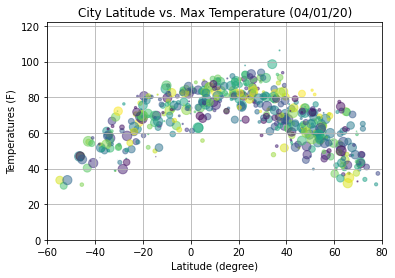

The highest temperatures are observed at latitudes between 20 and 40 degrees, with a culminant point at 40 degrees.


In [14]:
# Latitude vs. Temperature Plot
N = 563
x = weather_df["Lat"]
y = weather_df["Max Temp"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y,s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Temperatures (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlim(-60,80)
plt.ylim(0,122)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeTemperature.png")
plt.show()
print("The highest temperatures are observed at latitudes between 20 and 40 degrees, with a culminant point at 40 degrees.")

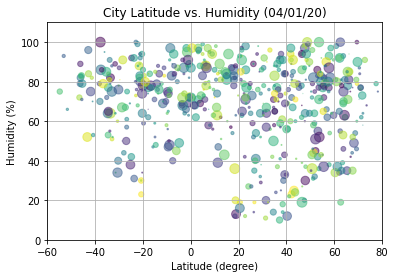

The above plot analyzes the relationship between Humidity in percentage and Latitude in degree.


In [16]:
# Latitude vs. Humidity Plot
N = 563
x = weather_df["Lat"]
y = weather_df["Humidity"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlim(-60,80)
plt.ylim(0,110)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeHumidity.png")
plt.show()
print("The above plot analyzes the relationship between Humidity in percentage and Latitude in degree.")


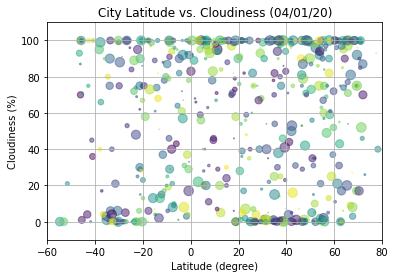

The above plot analyzes the relationship between Cloudiness in percentage and Latitude in degree.


In [17]:
# Latitude vs. Cloudiness Plot
N = 563
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlim(-60,80)
plt.ylim(-10,110)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeCloudiness.png")
plt.show()
print("The above plot analyzes the relationship between Cloudiness in percentage and Latitude in degree.")

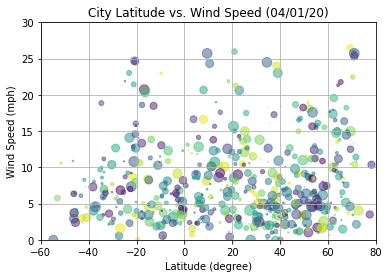

The above plot analyzes the relationship between Wind Speed in miles per hour and Latitude in degree.


In [18]:
# Latitude vs. Wind Speed Plot
N = 563
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.xlabel("Latitude (degree)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlim(-60,80)
plt.ylim(0,30)
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeWindSpeed.png")
plt.show()
print("The above plot analyzes the relationship between Wind Speed in miles per hour and Latitude in degree.")

# Second requirement: linear regression on each relationship

In [47]:
# Subset weather_df into two datasets based on Latitude values (Lat>=0 and Lat<0)

NorthernHemisphere = weather_df[weather_df["Lat"]>=0]

SouthernHemisphere = weather_df[weather_df["Lat"]<0]

print(NorthernHemisphere.shape)

print(SouthernHemisphere.shape)


(389, 9)
(174, 9)


# Northern Hemisphere Latitude and Temperature Scatterplot

The coefficient of correlation is:-0.7169003881733982


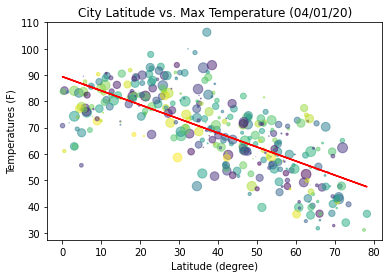

The Latitude is strongly and negatively correlated to the Temperature in the Northern Hemisphere.


In [77]:
# Create two arrays that represent Latitude and Temperature
x = NorthernHemisphere["Lat"]
y = NorthernHemisphere["Max Temp"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 389

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Temperatures (F)")

# Graph title
plt.title("City Latitude vs. Max Temperature (04/01/20)")


# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeTemperature_north.png")
plt.show()

# Explanation of r
print("The Latitude is strongly and negatively correlated to the Temperature in the Northern Hemisphere.")


# Southern Hemisphere Latitude and Temperature Scatterplot

The coefficient of correlation is:0.7920968756800614


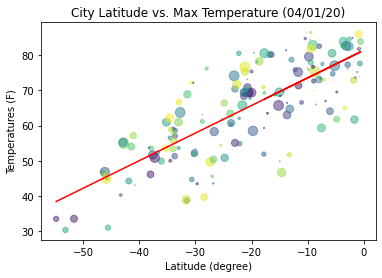

The Latitude is strongly and positively correlated to the Temperature in the Southern Hemisphere.


In [76]:
# Create two arrays that represent Latitude and Temperature
x = SouthernHemisphere["Lat"]
y = SouthernHemisphere["Max Temp"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 174

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Temperatures (F)")

# Graph title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeTemperature_south.png")
plt.show()

# Explanation of r
print("The Latitude is strongly and positively correlated to the Temperature in the Southern Hemisphere.")




# Northern Hemisphere Humidity (%) vs. Latitude Linear Regression Scatterplot

The coefficient of correlation is:-0.07772310995050338


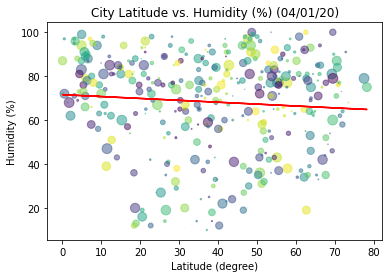

The Latitude and Humidity are weakly correlated in the Northern Hemisphere.


In [74]:
# Create two arrays that represent Latitude and Humidity
x = NorthernHemisphere["Lat"]
y = NorthernHemisphere["Humidity"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 389

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Humidity (%)")

# Graph title
plt.title("City Latitude vs. Humidity (%) (04/01/20)")


# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeHumidity_north.png")
plt.show()

# Explanation of r
print("The Latitude and Humidity are weakly correlated in the Northern Hemisphere.")


# Southern Hemisphere Humidity (%) vs. Latitude Linear Regression Scatterplot

The coefficient of correlation is:0.004439413093263263


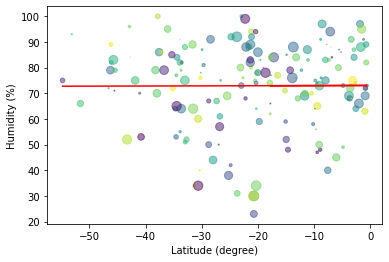

In [73]:
# Create two arrays that represent Latitude and Humidity
x = SouthernHemisphere["Lat"]
y = SouthernHemisphere["Humidity"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 174

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Humidity (%)")

# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeHumidity_south.png")
plt.show()


# Northern Hemisphere Cloudiness (%) vs. Latitude Linear Regression Scatterplot

The coefficient of correlation is:-0.023718251071921805


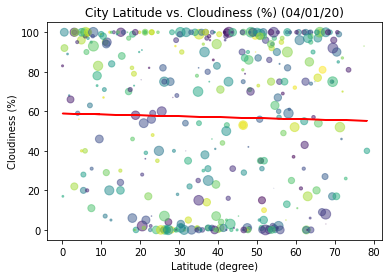

The Latitude and Cloudiness are weakly and negatively correlated in the Northern Hemisphere.


In [72]:
# Create two arrays that represent Latitude and Cloudiness 
x = NorthernHemisphere["Lat"]
y = NorthernHemisphere["Cloudiness"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 389

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Cloudiness (%)")

# Graph title
plt.title("City Latitude vs. Cloudiness (%) (04/01/20)")


# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeCloudiness_north.png")
plt.show()

# Explanation of r
print("The Latitude and Cloudiness are weakly and negatively correlated in the Northern Hemisphere.")


# Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression Scatterplot

The coefficient of correlation is:0.09942039405246654


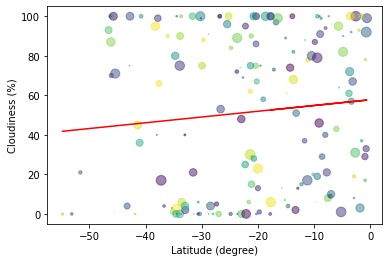

The Latitude and Cloudiness are weakly and positively correlated in the Southern Hemisphere.


In [79]:
# Create two arrays that represent Latitude and Cloudiness
x = SouthernHemisphere["Lat"]
y = SouthernHemisphere["Cloudiness"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 174

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Cloudiness (%)")

# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeCloudiness_south.png")
plt.show()

# Explanation of r
print("The Latitude and Cloudiness are weakly and positively correlated in the Southern Hemisphere.")

# Northern Hemisphere Latitude and Wind Speed (mph) Linear Regression Scatterplot

The coefficient of correlation is:0.11839813220075655


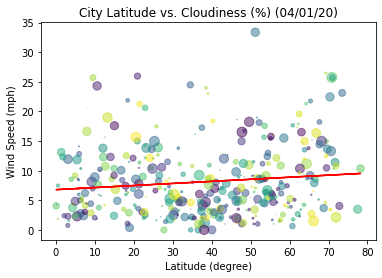

The Latitude and Wind Speed are weakly and positively correlated in the Northern Hemisphere.


In [81]:
# Create two arrays that represent Latitude and Wind Speed (mph) 
x = NorthernHemisphere["Lat"]
y = NorthernHemisphere["Wind Speed"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 389

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Wind Speed (mph)")

# Graph title
plt.title("City Latitude vs. Cloudiness (%) (04/01/20)")


# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeWindSpeed_north.png")
plt.show()

# Explanation of r
print("The Latitude and Wind Speed are weakly and positively correlated in the Northern Hemisphere.")


# Southern Hemisphere Latitude and Wind Speed (mph) Linear Regression Scatterplot

The coefficient of correlation is:0.02620109162404006


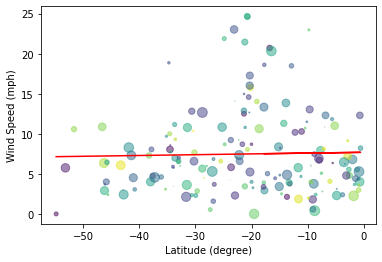

The Latitude and Wind Speed (mph) are weakly and positively correlated in the Southern Hemisphere.


In [83]:
# Create two arrays that represent Latitude and Wind Speed (mph)
x = SouthernHemisphere["Lat"]
y = SouthernHemisphere["Wind Speed"]

# Define a model to calculate some important indicators
slope, intercept, r, p, std_err  = stats.linregress(x, y)

# define the regression function
def regression(x):
  return slope * x + intercept

linear_regression = list(map(regression, x))

# Size of the NorthernHemisphere dataset
N = 174

# Defining area and color for each point in the scatterplot
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2 

 # Scatterplot
plt.scatter(x, y,s=area, c=colors, alpha=0.5)

# x-axis title
plt.xlabel("Latitude (degree)")

#y-axis title
plt.ylabel("Wind Speed (mph)")

# Drawing a customize line of regression  in the plot 
plt.plot(x, linear_regression, color="red")

# display r and the scatterplot 
print(f"The coefficient of correlation is:{r}")
plt.savefig("/Users/rodneydavermann/Desktop/Python_api_Challenge/OutputData/LatitudeWindSpeed_south.png")
plt.show()

# Explanation of r
print("The Latitude and Wind Speed (mph) are weakly and positively correlated in the Southern Hemisphere.")